# Simply plotting a few things from FIFA soccer data
### I did this to reinforce and display my understanding some data visualization
I don't even like FIFA that much, but I just found it interesting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
path = "/Users/Blob2/Desktop/Projects/data_files"
os.chdir(path)

fifa = pd.read_csv('fifa_data.csv')
pd.set_option('display.max_columns', 10)

Text(0, 0.5, 'Number Players')

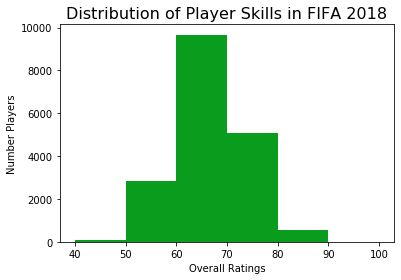

In [3]:
xbins = np.arange(40,110,10)
plt.hist(fifa['Overall'], bins=xbins, color='#099c1d')
plt.xticks(xbins)

plt.title('Distribution of Player Skills in FIFA 2018', fontdict={'fontsize':16})
plt.xlabel('Overall Ratings')
plt.ylabel('Number Players')

([<matplotlib.patches.Wedge at 0x1b5cda26c08>,
 [Text(1.599959749458015, 0.011349013800637096, 'Under 125'),
  Text(1.1920667267059661, 0.5186298478496235, '125-150'),
  Text(-1.168626085407096, 0.5694849185940631, '150-175'),
  Text(0.6659136718964599, -0.8755335410944427, '175-200'),
  Text(1.5967408039346644, -0.1020725479748713, 'Over 200')],
 [Text(1.099972327752385, 0.0078024469879380024, '0.23 %'),
  Text(0.7335795241267483, 0.3191568294459221, '12.61 %'),
  Text(-0.7191545140966745, 0.3504522575963466, '59.89 %'),
  Text(0.3632256392162508, -0.4775637496878778, '25.24 %'),
  Text(1.0977593027050816, -0.07017487673272402, '2.03 %')])

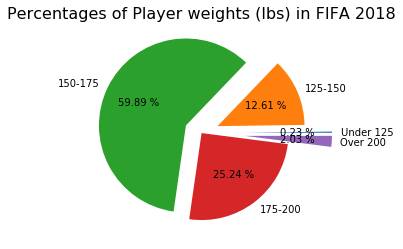

In [9]:
#  1) count conditions of a column
left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]

#  2) pie chart of preferred feet
# plt.pie([left, right], labels=['Left', 'Right'], colors=['r','b'], autopct='%.2f %%')


#  3) wrangling data --> strip off 'lbs' from number weight (e.g. '156lbs' to '156')
#   4) Note the if statement to make sure no errors --> CAN only strip if string
#    5) converted to float
fifa['Weight'] = [float(x.strip('lbs'))
                  if type(x)==str
                  else x
                  for x in fifa['Weight']]

# 6) sorting players by those weights
light = fifa.loc[fifa['Weight'] < 125].count()[0]
med_light = fifa.loc[(fifa['Weight'] >= 125) & (fifa['Weight'] < 150)].count()[0]
medium = fifa.loc[(fifa['Weight'] >= 150) & (fifa['Weight'] < 175)].count()[0]
med_heavy = fifa.loc[(fifa['Weight'] >= 175) & (fifa['Weight'] < 200)].count()[0]
heavy = fifa.loc[(fifa['Weight'] >= 200)].count()[0]
#   6.5) put them in list
weights = [light,med_light,medium,med_heavy,heavy]


plt.title('Percentages of Player weights (lbs) in FIFA 2018', fontdict={'fontsize':16})

#  7) exploding the specific parts of pie chart
explode = (.5, .2, .2, 0, .5)
plt.pie(weights, labels=['Under 125', '125-150', '150-175', '175-200', 'Over 200'], autopct='%.2f %%', explode=explode)


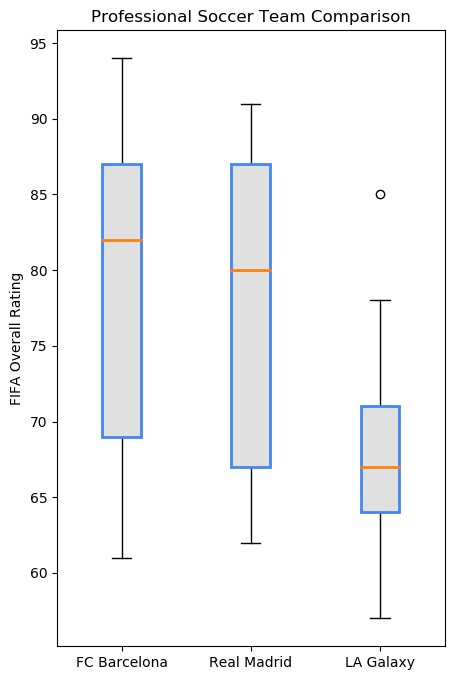

In [10]:
plt.style.use('default')
plt.figure(figsize=(5,8))

barca = fifa.loc[fifa['Club'] == 'FC Barcelona']['Overall']
madrid = fifa.loc[fifa['Club'] == 'Real Madrid']['Overall']
galaxy = fifa.loc[fifa['Club'] == 'LA Galaxy']['Overall']

#  storing the 3 boxplots as 'boxes'
boxes = plt.boxplot([barca, madrid, galaxy], labels=['FC Barcelona', 'Real Madrid', 'LA Galaxy'], patch_artist=True, medianprops={'linewidth':2})

# changing box color and thickness
for box in boxes['boxes']:
        # Set edge color and thickness
        box.set(color='#4286f4', linewidth=2)
        #  Set fill color
        box.set(facecolor='#e0e0e0')

plt.title('Professional Soccer Team Comparison')
plt.ylabel('FIFA Overall Rating')


plt.show()